<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-MCD/blob/main/12-BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BERTopic</h1>

En esta notebook usaremos [BERTopic](https://github.com/MaartenGr/BERTopic) para la tarea de Topic Modelling.

Este modelo usa un modelo de BERT para producir embeddings de documentos que luego son clusterizados y agrupados usando TF-IDF.

[Más información](https://maartengr.github.io/BERTopic/algorithm/algorithm.html)

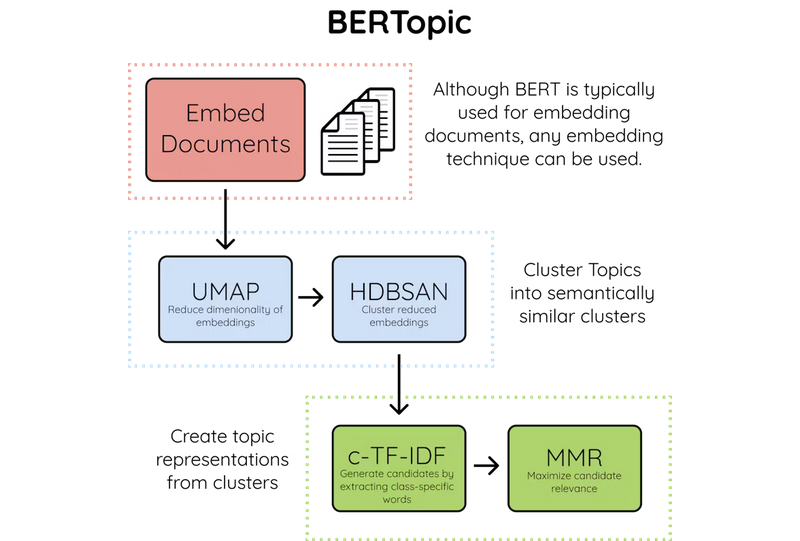

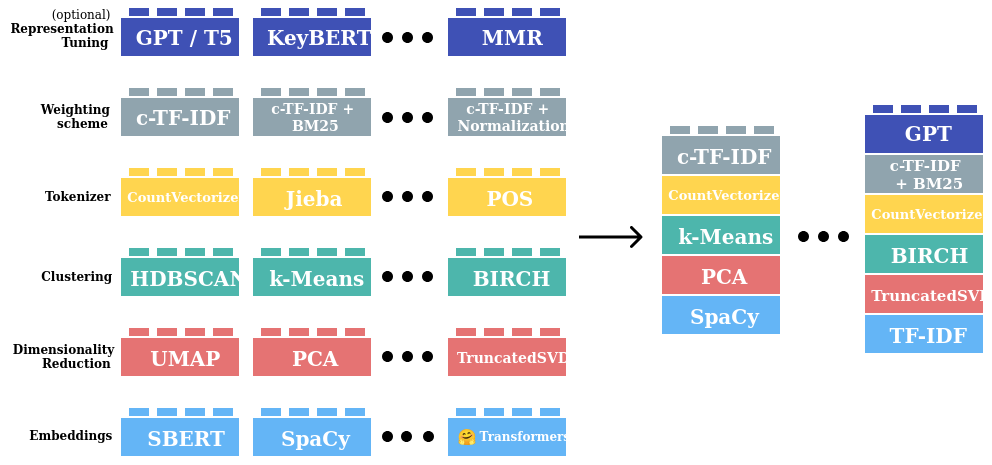

In [2]:
!pip install -qq bertopic[visualization]

In [35]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.0 MB/s eta 0:00:00


In [3]:
!pip install -qq wordcloud

# Demostración básica

In [4]:
from bertopic import BERTopic

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


## Corpus y preprocesamiento

In [9]:
import pandas as pd
import numpy as np
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

stopwords = stopwords.words('english')
stopwords.extend(['from', 'subject', 're', 'edu', 'use'])
stopwords.extend(["n't","S","s"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball','sci.med'],
                                random_state=642
                                )
test_data = fetch_20newsgroups(subset='test',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball','sci.med'],
                                random_state=642
                               )

X_train_raw = train_data.data
y_train = train_data.target

X_test_raw = test_data.data
y_test = test_data.target

In [7]:
X_raw = X_train_raw + X_test_raw
y = np.concatenate((y_train, y_test))

In [10]:
X_raw = [re.sub(r'\d+', ' ', doc) for doc in X_raw]
tokenized_docs = [[x for x in word_tokenize(doc) if x not in stopwords and x not in punctuation]
                        for doc in X_raw]
docs = [' '.join(doc) for doc in tokenized_docs]

## Entrenamiento de BERTopic

El entrenamiento tarda alrededor de 4 minutos

In [11]:
model = BERTopic(verbose=True)

topics, probabilities = model.fit_transform(docs)

2025-10-23 21:24:03,641 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

2025-10-23 21:27:28,597 - BERTopic - Embedding - Completed ✓
2025-10-23 21:27:28,599 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-10-23 21:27:54,755 - BERTopic - Dimensionality - Completed ✓
2025-10-23 21:27:54,760 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-10-23 21:27:54,975 - BERTopic - Cluster - Completed ✓
2025-10-23 21:27:54,995 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-10-23 21:27:55,502 - BERTopic - Representation - Completed ✓


## Resultados

Cuando hay un tópico -1, este representa documentos *outliers*

In [12]:
model.get_topic_freq()

,Topic,Count
1,0,1967
0,1,894
2,2,69
3,3,41


Número de tópicos:

In [13]:
num_topics = len([x for x in model.get_topic_info()['Topic'] if x != -1])
num_topics

4

Información de los tópicos

In [14]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,1967,0_the_space_would_one,"[the, space, would, one, also, it, this, like,...",[Archive-name space/data Last-modified Date ON...
1,1,894,1_game_year_would_the,"[game, year, would, the, team, games, last, th...",[I trying think respond without involving pers...
2,2,69,2_curiousity_worden_hello_just,"[curiousity, worden, hello, just, old, anyone,...","[anyone know --, Hello, Just curiousity old Wo..."
3,3,41,3_bullshit_why_good_it,"[bullshit, why, good, it, , , , , , ]","[good, Why, BULLSHIT]"


Información de los documentos

In [47]:
model.get_document_info(docs).sample(5)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
702,Well OBP important offensive statistic big mar...,2,2_game_year_would_the,"[game, year, would, the, team, games, last, th...",[I trying think respond without involving pers...,game - year - would - the - team - games - las...,1.000000,False
914,Now hand Juan Gonzales probably DOES shot HR '...,2,2_game_year_would_the,"[game, year, would, the, team, games, last, th...",[I trying think respond without involving pers...,game - year - would - the - team - games - las...,0.774988,False
1263,The Centaur controlled technology .. State Dep...,3,3_the_space_would_one,"[the, space, would, one, also, it, this, like,...",[As promised personal critique Pressure Point ...,the - space - would - one - also - it - this -...,1.000000,False
2832,Speaking paper years ago weather sat imaging l...,3,3_the_space_would_one,"[the, space, would, one, also, it, this, like,...",[As promised personal critique Pressure Point ...,the - space - would - one - also - it - this -...,1.000000,False
2196,It 's quite asking years ago I helped EE remot...,3,3_the_space_would_one,"[the, space, would, one, also, it, this, like,...",[As promised personal critique Pressure Point ...,the - space - would - one - also - it - this -...,1.000000,False


## Visualización

In [15]:
model.visualize_topics()

In [16]:
model.visualize_barchart()

Veamos las palabras más importantes por cada tópico

In [17]:
for k in range(num_topics):
    words = [x[0] for x in model.get_topic(k)]
    print(f"Topic {k}: {words}")

Topic 0: ['the', 'space', 'would', 'one', 'also', 'it', 'this', 'like', 'get', 'people']
Topic 1: ['game', 'year', 'would', 'the', 'team', 'games', 'last', 'think', 'baseball', 'good']
Topic 2: ['curiousity', 'worden', 'hello', 'just', 'old', 'anyone', 'know', '', '', '']
Topic 3: ['bullshit', 'why', 'good', 'it', '', '', '', '', '', '']


Similitud entre tópicos. Se calcula como la similitud coseno entre los centroides de los embeddings de los documentos de cada tópico

In [18]:
model.visualize_heatmap()

In [19]:
topics, probs = model.transform(docs)

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

2025-10-23 21:31:12,451 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-10-23 21:31:12,462 - BERTopic - Dimensionality - Completed ✓
2025-10-23 21:31:12,463 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-10-23 21:31:12,567 - BERTopic - Cluster - Completed ✓


Topics es el arreglo de tópicos

In [30]:
print(len(topics))
print(np.unique(topics))
topics[:10]

2971
[0 1 2 3]


[np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0)]

Esta representación tarda alrededor de 5 minutos. Es una reducción de dimensionalidad sobre los embeddings de documentos

In [20]:
model.visualize_documents(docs, topics)

## Evaluación

Dado que tenemos etiquetas *ground-truth* podemos evaluar con Información Mutua

In [21]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

print(f"AMI: {adjusted_mutual_info_score(y, topics)}")
print(f"ARI: {adjusted_rand_score(y, topics)}")

AMI: 0.5081663562383111
ARI: 0.4480507124387643


Podemos explorar las palabras más frecuentes con una wordcloud

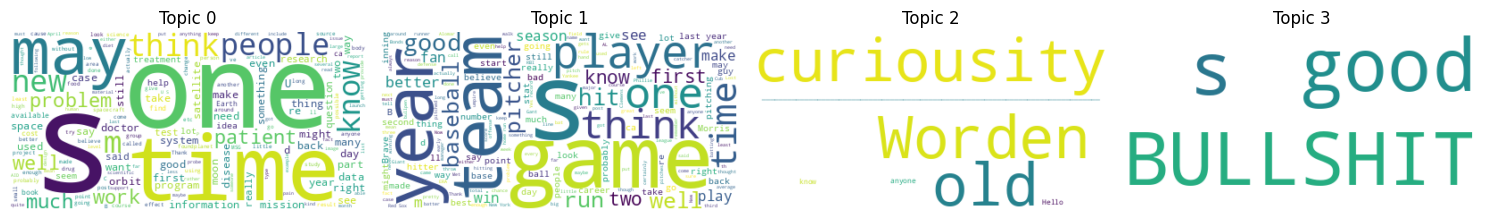

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs_idxs_per_topic = [np.where(np.array(topics) == i)[0] for i in range(num_topics)]

fig, axs = plt.subplots(1, num_topics, figsize=(15, 15))
for ax,j in zip(axs.flatten(),range(num_topics)):
    topic_docs = " ".join([docs[i] for i in docs_idxs_per_topic[j]])
    wc = WordCloud(background_color="white", max_words=2000).generate(topic_docs)
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Topic {j}")
    ax.axis("off")
fig.tight_layout()
fig.show()

# Detalles adicionales

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

# Modelo de embeddings
embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Reducción de dimensionalidad: PCA en lugar de UMAP (default)
dim_model = PCA()

# Método de clustering: DBSCAN en lugar de HDBSCAN (default)
cluster_model = DBSCAN(eps=0.5, min_samples=2)

# Modelo BERTopic
new_model = BERTopic(
                    nr_topics=10,
                    embedding_model=embedding_model,
                    umap_model=dim_model,  # Se llama umap_model pero acepta cualquier reductor de dimensionalidad
                    hdbscan_model=cluster_model,  # Se llama hdbscan_model pero acepta cualquier clustering
                    language='english',
                    calculate_probabilities=False,
                    verbose=True
                )

# new_model = BERTopic(nr_topics=10)

new_topics, new_probabilities = new_model.fit_transform(docs)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-10-23 23:34:47,601 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

2025-10-23 23:38:21,882 - BERTopic - Embedding - Completed ✓
2025-10-23 23:38:21,884 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-10-23 23:38:22,081 - BERTopic - Dimensionality - Completed ✓
2025-10-23 23:38:22,103 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-10-23 23:38:22,491 - BERTopic - Cluster - Completed ✓
2025-10-23 23:38:22,492 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-10-23 23:38:22,871 - BERTopic - Representation - Completed ✓
2025-10-23 23:38:22,872 - BERTopic - Topic reduction - Reducing number of topics
2025-10-23 23:38:22,889 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-10-23 23:38:23,200 - BERTopic - Representation - Completed ✓
2025-10-23 23:38:23,206 - BERTopic - Topic reduction - Reduced number of topics from 20 to 10


In [40]:
from bertopic import BERTopic
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import re
from nltk.tokenize import word_tokenize

def calculate_coherence(topic_model, docs, topics, metric='u_mass', top_n=10):
    """
    Calcula coherencia usando gensim para tópicos de BERTopic

    Args:
        topic_model: Modelo BERTopic entrenado
        docs: Lista de documentos
        topics: Lista de tópicos asignados
        metric: 'u_mass', 'c_v', 'c_uci', 'c_npmi'
        top_n: Número de palabras top por tópico
    """
    # Tokenizar documentos
    tokenized_docs = [word_tokenize(doc) for doc in docs]

    # Crear diccionario de gensim
    dictionary = Dictionary(tokenized_docs)

    # Obtener tópicos de BERTopic (excluyendo outliers -1)
    topic_ids = [t for t in set(topics) if t != -1]

    # Extraer palabras top de cada tópico
    topic_words = []
    for topic_id in sorted(topic_ids):
        words = topic_model.get_topic(topic_id)
        if words:
            # Obtener solo las palabras (sin scores)
            top_words = [word for word, score in words[:top_n]]
            topic_words.append(top_words)

    if len(topic_words) == 0:
        return None, None

    # Calcular coherencia con gensim
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence=metric
    )

    return coherence_model.get_coherence()

In [39]:
calculate_coherence(new_model, docs, new_topics)

np.float64(-7.133542848961714)

In [32]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

print(f"AMI: {adjusted_mutual_info_score(y, new_topics)}")
print(f"ARI: {adjusted_rand_score(y, new_topics)}")

AMI: 0.014209347096739341
ARI: 2.555766323296836e-07


In [33]:
new_model.visualize_topics()

In [34]:
new_model.visualize_heatmap()

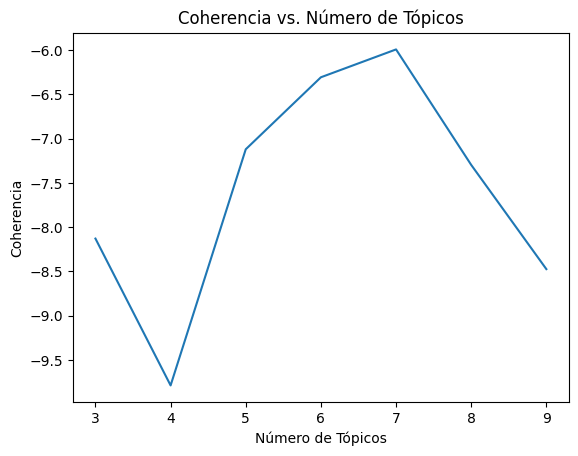

In [41]:
import matplotlib.pyplot as plt

min_n, max_n = 3,10
num_topics = list(range(min_n,max_n+1))
coherence = []
for num in num_topics:
    model = BERTopic(nr_topics=num)
    new_topics, new_probabilities = model.fit_transform(docs)
    coherence.append(calculate_coherence(model, docs, new_topics))
    print(f"Número de tópicos: {num+1}/{max_n-min_n}")

plt.plot(num_topics, coherence)
plt.xlabel('Número de Tópicos')
plt.ylabel('Coherencia')
plt.title('Coherencia vs. Número de Tópicos')
plt.show()

# 🔴 Tarea:

Obtener los embeddings de cada documento con algún modelo tipo BERT y clusterizarlos. ¿Se mejoran el rendimiento?